<a href="https://colab.research.google.com/github/yusufbaykal/Patika.dev/blob/main/Binalar%C4%B1n_Enerji_Verimlili%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gerekli Kütüphanelerin Yüklenmesi**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# **Verinin yüklenmesi ve İstatistik değerlerin kontrolü**

In [4]:
df = pd.read_csv("//content/ENB2012_data.csv")

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# **Verilerin Hazırlanması**

In [9]:
x = df.iloc[:,:-2]
y = df.iloc [:,-2]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [11]:
Sc = StandardScaler()
X_train = Sc.fit_transform(x_train)
X_test = Sc.fit_transform(x_test)

# **Random Forest**




In [12]:
random_li = RandomForestRegressor(n_estimators=10,n_jobs=-1)
random_li.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
y_pred = random_li.predict(x_test)

In [14]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y,random_li.predict(x))
RMSE = np.sqrt(MSE)
print("Hata Kareler Ortalaması:",MSE)
print("Ortalama Mutlak Hata:",MAE)
print("Hata Kareler Ortalamasının Karesi:",RMSE)


Hata Kareler Ortalaması: 0.11340629947916682
Ortalama Mutlak Hata: 0.35397244094488206
Hata Kareler Ortalamasının Karesi: 0.336758518049903


In [15]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [16]:
def print_score(random_li):
    print(f"RMSE of train set'{rmse(random_li.predict(x_train), y_train)}")
    print(f"RMSE of test set {rmse(random_li.predict(x_test), y_test)}")
    print(f"R^2 of train set{random_li.score(x_train, y_train)}")
    print(f"R^2 of test set{random_li.score(x_test, y_test)}")

In [17]:
print_score(random_li)

RMSE of train set'0.20069785351285988
RMSE of test set 0.5112602500753278
R^2 of train set0.999600375862146
R^2 of test set0.9974730700413535


In [18]:
random_li = RandomForestRegressor(n_estimators=30,n_jobs=-1)
%time random_li.fit(x_train,y_train)
print_score(random_li)

CPU times: user 76.2 ms, sys: 6.91 ms, total: 83.1 ms
Wall time: 117 ms
RMSE of train set'0.20663771030565362
RMSE of test set 0.5566772862708426
R^2 of train set0.9995763712573246
R^2 of test set0.9970041769979933


### **Model Görselleştirme**

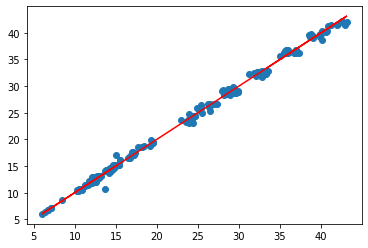

In [19]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')

# **Polinomal Regresyon**

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
X = x.values
Y = y.values

In [22]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
ploy_reg = PolynomialFeatures(degree=4)
x_poly = ploy_reg.fit_transform(x)


In [25]:
lin_reg2 = LinearRegression()

In [26]:
lin_reg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
r2_score(y,lin_reg2.predict(ploy_reg.fit_transform(x)))

0.9987537168618618

# **Decesion Tree**

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree_li = DecisionTreeRegressor(random_state=0)

In [30]:
tree_li.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [31]:
y_pred1 = tree_li.predict(x_test)

In [32]:
print_score(tree_li)

RMSE of train set'3.9175870671146995e-17
RMSE of test set 7.881309022438232e-17
R^2 of train set1.0
R^2 of test set1.0


# **Ridge** **Regressor**


In [33]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
y_pred2 = ridge_model.predict(x_train)

In [36]:
ridge_model.coef_

array([-1.96863105e+01, -8.56990702e-03,  3.75703654e-02, -2.30701353e-02,
        4.85322090e+00, -1.33058183e-01,  1.93123565e+01,  1.97872644e-01])

In [37]:
ridge_model.intercept_

5.122067068405141

In [38]:
np.linspace(10,-2,100)
lambdalar = 10**np.linspace(10,-2,100,)*0.5

In [39]:
ridge_model = Ridge()
katsayılar= []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)

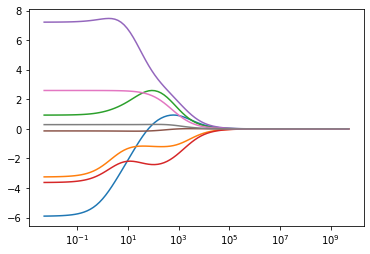

In [40]:
ax = plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")

In [41]:
ridge_model = Ridge().fit(x_train,y_train)
y_pred2 = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred2))

3.226024906071975

In [42]:
print_score(ridge_model)

RMSE of train set'2.897077789651966
RMSE of test set 3.2260249060719746
R^2 of train set0.9167303824011555
R^2 of test set0.8993892051512118
